Information for the subtraction array:
Dimensions of the matrix: (2267, 2267)
Type of matrix data: int32
Min intensity value: 0
Max intensity value: 194
Mean value: 1.6740749547262277
The image is saved in: C:/Users/sapd/Desktop/X23_0081_Pigment_temp\DCSQI_annealed_40mm_240min_om0_ph10rpm_201223_Sub.tif


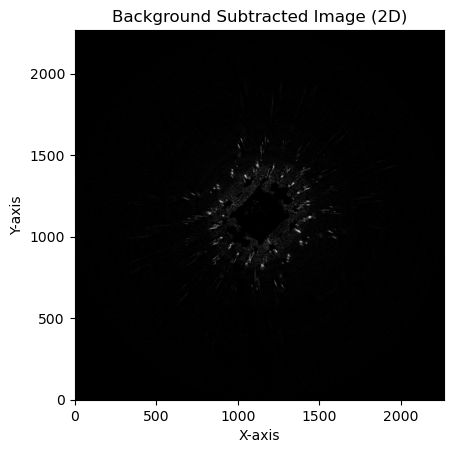

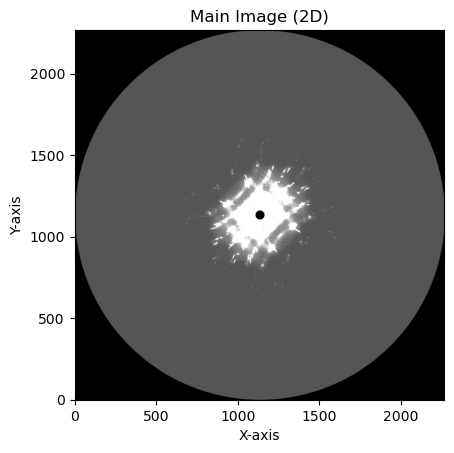

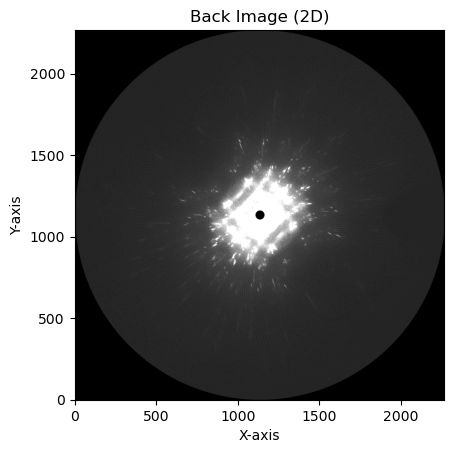

In [24]:
## Image Plate Diffraction System ##

## Background Subtraction Images Greyscale (Version 1.2) ##

## Empa, Center for X-ray Analytics, D.Sapalidis, St. Gallen, Switzerland, 22.12.2023 ##

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import zoom

class BackgroundSubtraction:
    def __init__(self, main_path, back_path, back_coefficient=0.1):
        self.main_path = main_path
        self.back_path = back_path
        self.back_coefficient = back_coefficient
        self.main_array = None
        self.back_array = None

    def load_image(self, path):
        return np.array(Image.open(path).convert('L'))

    def apply_background_subtraction(self):
        main = self.load_image(self.main_path)
        back = self.load_image(self.back_path)

        # Convert into numpy arrays
        self.main_array = main.astype('int32')
        self.back_array = back.astype('int32')

        # Subtraction of the background array-image
        diff = np.clip(self.main_array - self.back_coefficient * self.back_array, 0, self.main_array.max())

        # Information for the subtraction array
        print("Information for the subtraction array:")
        print(f"Dimensions of the matrix: {diff.shape}")
        print(f"Type of matrix data: {diff.dtype}")
        print(f"Min intensity value: {np.min(diff)}")
        print(f"Max intensity value: {np.max(diff)}")
        print(f"Mean value: {np.mean(diff)}")

        # Save the background subtracted image in the same file directory with the main image
        main_dir, main_filename = os.path.split(self.main_path)
        result_path = os.path.join(main_dir, f'{os.path.splitext(main_filename)[0]}_Sub.tif')
        Image.fromarray(diff.astype(np.uint16)).save(result_path)

        print(f'The image is saved in: {result_path}')
        return diff

    def display_back_image_2d(self):
        plt.imshow(self.back_array, cmap='gray', origin='lower')
        plt.title('Back Image (2D)')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()
        
    
class ImageLoader:
    def __init__(self, image_path):
        self.image_path = image_path

    def load_image(self):
        return np.array(Image.open(self.image_path))

    def display_2d_image(self, image, title):
        plt.imshow(image, cmap='gray', origin='lower')
        plt.title(title)
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.show()
        
    def display_main_image(self):
        image = self.load_image()
        grayscale_image = np.mean(image, axis=2)
        self.display_2d_image(grayscale_image, 'Main Image (2D)')

# Type the path of the main image and its background image - need to convert "\" to "/"
main_image_path = 'C:/Users/sapd/Desktop/X23_0081_Pigment_temp/DCSQI_annealed_40mm_240min_om0_ph10rpm_201223.tif'
back_image_path = 'C:/Users/sapd/Desktop/X23_0081_Pigment_temp/Si_40mm_240min_om0_ph10rpm_211223.tif'
back_coefficient_value = 1

background_subtraction = BackgroundSubtraction(main_image_path, back_image_path, back_coefficient_value)
result_diff = background_subtraction.apply_background_subtraction()

image_loader = ImageLoader(main_image_path)
image_loader.display_2d_image(result_diff, 'Background Subtracted Image (2D)')
image_loader.display_main_image()
background_subtraction.display_back_image_2d()  